In [1]:
import monkdata as m
import dtree as DT

In [2]:
## Assignment1

In [3]:
DT.entropy(m.monk1)

1.0

In [4]:
DT.entropy(m.monk2)

0.957117428264771

In [5]:
DT.entropy(m.monk3)

0.9998061328047111

In [6]:
#Assignment3

In [7]:
for i in range(6):
    print(DT.averageGain(m.monk1, m.attributes[i]))

0.07527255560831925
0.005838429962909286
0.00470756661729721
0.02631169650768228
0.28703074971578435
0.0007578557158638421


In [8]:
for i in range(6):
    print(DT.averageGain(m.monk2, m.attributes[i]))

0.0037561773775118823
0.0024584986660830532
0.0010561477158920196
0.015664247292643818
0.01727717693791797
0.006247622236881467


In [9]:
for i in range(6):
    print(DT.averageGain(m.monk3, m.attributes[i]))

0.007120868396071844
0.29373617350838865
0.0008311140445336207
0.002891817288654397
0.25591172461972755
0.007077026074097326


In [10]:
# Assignment5

In [11]:
# full tree 1
import monkdata as m
import dtree as d
t = d.buildTree(m.monk1, m.attributes) 

print(d.check(t, m.monk1))
print(d.check(t, m.monk1test))
print(t)

1.0
0.8287037037037037
A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))


In [12]:
# full tree 2
import monkdata as m
import dtree as d
t = d.buildTree(m.monk2, m.attributes) 

print(d.check(t, m.monk2))
print(d.check(t, m.monk2test))

1.0
0.6921296296296297


In [13]:
# full tree 3
import monkdata as m
import dtree as d
t = d.buildTree(m.monk3, m.attributes) 

print(d.check(t, m.monk3))
print(d.check(t, m.monk3test))

1.0
0.9444444444444444


In [14]:
# select the attribute a5!=1 to split the data
data1 = d.select(m.monk1, m.attributes[4], 2 or 3 or 4)


In [15]:
#cacullate the info gain for other attributes(a1,a2,a3,a4,a6)
for i in range(6):
    print(d.averageGain(data1, m.attributes[i]))

0.040216841609413634
0.015063475072186083
0.03727262736015946
0.04889220262952931
0.0
0.025807284723902146


In [16]:
#Build the tree with the first two levels
def buildTree2(dataset, attributes, maxdepth=2):
    "Recursively build a decision tree"

    def buildBranch(dataset, default, attributes):
        if not dataset:
            return d.TreeLeaf(default)
        if d.allPositive(dataset):
            return d.TreeLeaf(True)
        if d.allNegative(dataset):
            return d.TreeLeaf(False)
        return buildTree2(dataset, attributes, maxdepth-1)

    default = d.mostCommon(dataset)
    if maxdepth < 1:
        return d.TreeLeaf(default)
    a = d.bestAttribute(dataset, attributes)
    attributesLeft = [x for x in attributes if x != a]
    branches = [(v, buildBranch(d.select(dataset, a, v), default, attributesLeft))
                for v in a.values]
    return d.TreeNode(a, dict(branches), default)

t = buildTree2(m.monk1, m.attributes) 
#draw.drawTree(t)
print(t)
print(d.check(t, m.monk1))
print(d.check(t, m.monk1test))

A5(+A4(---)A6(--)A1(--+))
0.7580645161290323
0.7222222222222222


In [17]:
#Assignment7

In [22]:
# dividing the original training data to traning and validation data
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[: breakPoint], ldata[breakPoint :]

monk1train, monk1val = partition(m.monk1, 0.6)


In [23]:
# get a best pruning for each partition.
def bestPruning(data, testing):
    
    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    list_alt = []

    for fraction in fractions:
        train, val = partition(data, fraction)
        tree = d.buildTree(train, m.attributes)
        alternatives = d.allPruned(tree)

        best_perform = d.check(tree, val)
        best_tree = tree

        for alternative in alternatives:
            cur_perform = d.check(alternative, val)
            if best_perform < cur_perform:
                best_perform = cur_perform
                best_tree = alternative

        list_alt.append(1 - d.check(best_tree, testing))
    return list_alt


In [20]:
# get the mean and Std for random data
import numpy as np

monk1_pruned = []
monk3_pruned = []

for i in range(200):
        
    monk1_pruned.append(bestPruning(m.monk1, m.monk1test))
    monk3_pruned.append(bestPruning(m.monk3, m.monk3test))

monk1_pruned = np.transpose(monk1_pruned)
monk3_pruned = np.transpose(monk3_pruned)

monk1Mean = np.mean(monk1_pruned, axis=1)

monk3Mean = np.mean(monk3_pruned, axis=1)

monk1Std = np.std(monk1_pruned, axis=1)

monk3Std = np.std(monk3_pruned, axis=1)
 
monk1Mean
monk3Std

array([0.05552914, 0.03848452, 0.03436317, 0.03190274, 0.02744272,
       0.03331113])

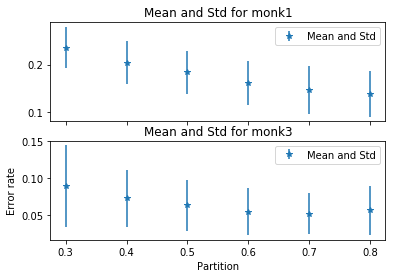

In [25]:
#draw figures for each
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

x1 = np.array(fractions)
y1 = monk1Mean
e1 = monk1Std

y2 = monk3Mean
e2 = monk3Std

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

ax0.errorbar(x1, y1, yerr=e1, fmt='*', label= 'Mean and Std')
ax0.set_title('Mean and Std for monk1')

plt.ylabel('Error rate')

ax1.errorbar(x1, y2, yerr=e2, fmt='*', label= 'Mean and Std')
ax1.set_title('Mean and Std for monk3')

plt.xlabel('Partition')

ax0.legend()
ax1.legend()
plt.show()